<a href="https://colab.research.google.com/github/userlinklearner/Pyhton-Projects/blob/main/T12_Lab_HCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">T12 Lab</font></h1>
<hr>

# **Clusterização Hierárquica**

# Recordando a Teoria

Reveja aqui o processo complete o Clusterização Hierárquica.

```
# Define os dados do modelo
X = df[...]

# Normalização e outras preparações dos dados 
from sklearn.preprocessing import normalize 
X = normalize(X)

# Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(X, labels, metric='euclidean'))

# Faz a clusterização selecionada

## Declara o modelo
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

## 'Treina' o modelo
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

# Associando os dados
df['cluster'] = labels
print(df.head())
```

# Caso: **Airbnb NYC 2019** 

Neste data set você encontra dados do Airbnb de NYC de 2019. Explore os dados e em seguida faça uma clusterização dos imóveis com base nos atributos numérico e o tipo de apartamento (`room_type`).

https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv

# **IMPORTANTE** Para o questionário

Em sala empregaremos a versão reduzida do arquivo. Para responder o questionário empregue a versão estendida (sem o `_TIC` no final).

https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019.csv



# Exercício. Acesse e Explore os dados

In [ ]:
# Seu Código
import numpy as np
import pandas as pd

df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv') 
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182
3,135465,Garden apartment close to Manhattan,663879,Christopher,Brooklyn,Fort Greene,40.68626,-73.97598,Entire home/apt,170,3,86,2019-06-20,0.91,2,286
4,169002,Modern Space in Charming Pre-war,805344,Alec,Manhattan,Harlem,40.82411,-73.94934,Private room,65,2,41,2019-06-16,0.43,2,59


In [ ]:
df.iloc[0]

id                                                             20913
name                              Charming 1 bed GR8 WBurg LOCATION!
host_id                                                        79402
host_name                                                 Christiana
neighbourhood_group                                         Brooklyn
neighbourhood                                           Williamsburg
latitude                                                     40.7098
longitude                                                   -73.9578
room_type                                            Entire home/apt
price                                                            100
minimum_nights                                                     5
number_of_reviews                                                168
last_review                                               2018-07-22
reviews_per_month                                               1.57
calculated_host_listings_count    

In [ ]:
df.shape

(628, 20)

# Exercício. Verifique a presença de Nulos

Verifique se existem dados nulos e, em caso positivos, opte por eliminar esses casos.

DICA: `isna()`, `dropna()`

In [ ]:
# Seu Código
df.isna().sum()

id                                  0
name                                1
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       176
reviews_per_month                 176
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [ ]:
df = df.dropna()

# Exercício. Faça o Hot Encode de `room_type`

Verifique os valores de `room_type` e faça o *Hot Encode* do atributos. Você pode querer mudar o nome dos atributos ao final. Para isso empregue o `rename`.

DICAS:
```
# Hot encode
dummies = pd.get_dummies(df.<atributo>,prefix='<prefix>')
df = pd.concat([df, dummies],axis=1)

# Rename Columns
df.rename(columns={'antes1':'depois1', 'antes2':'depois'},inplace=True)
```

In [ ]:
df.room_type.value_counts()

Entire home/apt    337
Private room       276
Shared room         15
Name: room_type, dtype: int64

In [ ]:
# Seu Código
dummies = pd.get_dummies(df.room_type,prefix='room_type')
df = pd.concat([df, dummies],axis=1)


In [ ]:
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [ ]:
df.rename(columns={'room_type_Entire home/apt':'rtype_entire', 'room_type_Private room':'rtype_private',
       'room_type_Shared room':'rtype_shared'},inplace=True)

In [ ]:
df.iloc[0]

id                                                             20913
name                              Charming 1 bed GR8 WBurg LOCATION!
host_id                                                        79402
host_name                                                 Christiana
neighbourhood_group                                         Brooklyn
neighbourhood                                           Williamsburg
latitude                                                     40.7098
longitude                                                   -73.9578
room_type                                            Entire home/apt
price                                                            100
minimum_nights                                                     5
number_of_reviews                                                168
last_review                                               2018-07-22
reviews_per_month                                               1.57
calculated_host_listings_count    

# Exercício. Defina a entrada `X`

Defina a entrada `X` somente com os atributos de interesse (valores numéricos e o *hot encode* de `room_type`).

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared'],
      dtype='object')

In [ ]:
# Seu Código
X = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared']]


In [ ]:
X.shape

(628, 11)

# Exercício. Normalize os dados 

Vamos empregar o `normalize`. 

In [ ]:
# Seu Código
from sklearn.preprocessing import normalize 
X = normalize(X)


In [ ]:
X

array([[ 0.19110178, -0.34717547,  0.46942405, ...,  0.00469424,
         0.        ,  0.        ],
       [ 0.14770662, -0.26838814,  0.45382584, ...,  0.00363061,
         0.        ,  0.        ],
       [ 0.08530554, -0.15521192,  0.35451746, ...,  0.00209774,
         0.        ,  0.        ],
       ...,
       [ 0.20521076, -0.37269031,  0.37813894, ...,  0.00504185,
         0.        ,  0.        ],
       [ 0.09073109, -0.16470913,  0.623243  , ...,  0.00222587,
         0.        ,  0.        ],
       [ 0.16809573, -0.30459933,  0.32957355, ...,  0.        ,
         0.00411967,  0.        ]])

# Exercício. Selecione o número de Clusters

Empregue a Clusterização Hierárquica Aglomerativa, com distência Euclidiana e `linkage='ward'`. Você vai então verificar a métrica `Siclhouette`.




In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Seu Código
for n_clusters in range(2,12):
  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  cluster.fit_predict(X)
  labels = cluster.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(X, labels, metric='euclidean'))

Média do valor de Silhouette para  2  clusters:  0.46534861846037073
Média do valor de Silhouette para  3  clusters:  0.3851541464384164
Média do valor de Silhouette para  4  clusters:  0.31691198977245194
Média do valor de Silhouette para  5  clusters:  0.35358948134228435
Média do valor de Silhouette para  6  clusters:  0.33991677055642056
Média do valor de Silhouette para  7  clusters:  0.34147732758150195
Média do valor de Silhouette para  8  clusters:  0.3324090459885509
Média do valor de Silhouette para  9  clusters:  0.3070879474844812
Média do valor de Silhouette para  10  clusters:  0.3135447532515795
Média do valor de Silhouette para  11  clusters:  0.31439026277313087


# Exercício. Clusterize os dados para o número de Clusters Selecionado

Exiba os rótulos (labels) gerados. Adicione então os labels ao dataframe original em uma nova coluna `cluster`.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
## Declara o modelo
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
 
## 'Treina' o modelo
clf.fit(X)
 
# Resultados
labels = clf.labels_
print(labels)
 
# Associando os dados
df['cluster'] = labels
print(df.head())



[0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 1 1 1 1 1 0 

# Exercício. Exiba o Dendograma (**RESOLVIDO**)

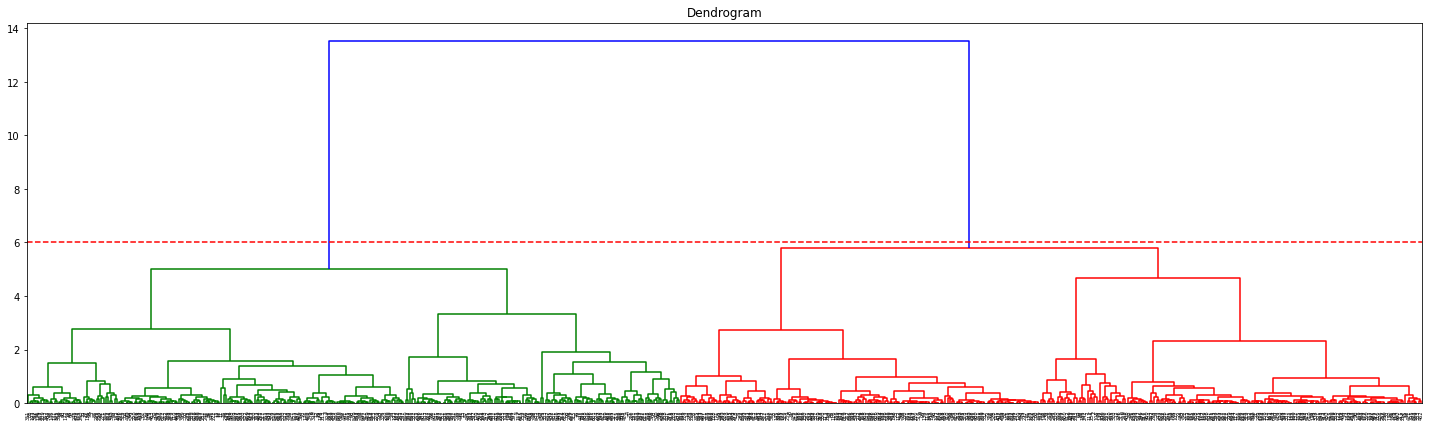

In [ ]:
# Seu código
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))  
plt.title("Dendrogram")
plt.xticks(rotation=90)  

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


# Exercício. Caracterizando os grupos (**RESOLVIDO**)

Verificando os valores médios de cada grupo.

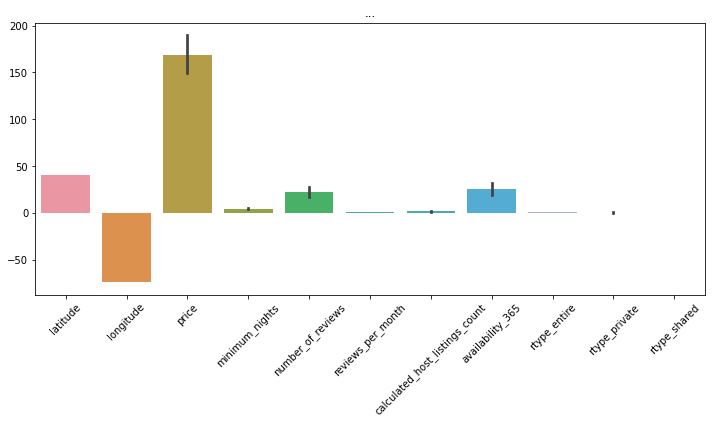

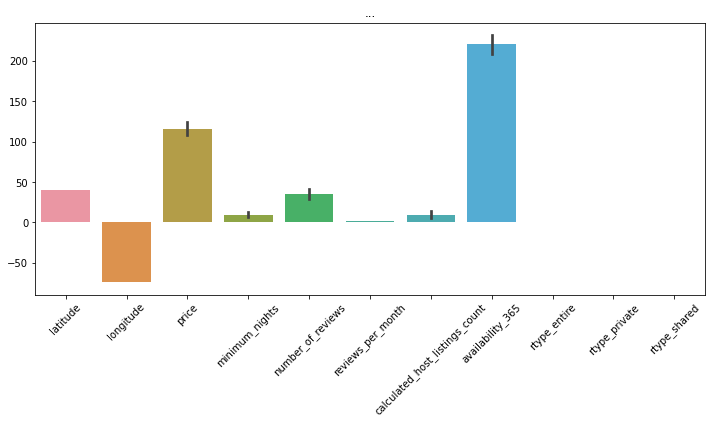

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared',
        'cluster']]

f = plt.figure(figsize=(12,5))

sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()